# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 5</center>

# <center>Feature Engineering</center>

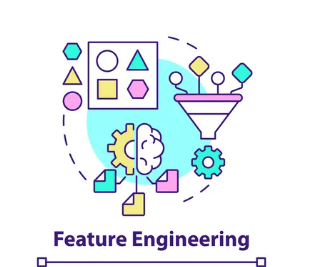

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Imputing Numerical Features </li>
<li> Detecting Outlier</li>
<li> Feature Transformation</li>
<li> Feature Scaling </li>
<li> Working with Categorical Features </li>
<li> Combine Features</li>
</ol>

## 0. Learning Objectives

Implement Numerical feature engineering techniques such as outlier detection, feature transformation, and feature scaling.

By the end of the lab, you should be able to :
- Apply required feature engineering techniques to given dataset.


- Prepare features for traning machine learning model.

# 1. Imputing Numerical  Features using sklearn

Instructions:

- Load data from loan_train.csv file. Create a dataframe names `ndf` which contains only numerical features. Default datatype of `Dependents` feature is `object`. Do you think it should be numerical feature? Justify your answer.


- Use sklearn SimpleImputer to Impute the missing values using most suitable strategy.



In [24]:
# Write your solution here
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv('loan_train.csv')
n_ndf = df.select_dtypes(include = 'number')
impute = SimpleImputer(strategy='mean')
ndf = impute.fit_transform(n_ndf)
ndf = pd.DataFrame(data = ndf, columns = n_ndf.columns)
ndf.isna().sum()



ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# 2. Outlier Detection

Instructions:

- Choose any one numerical feature and check if there is any outliers.


- Use both inter quartile range method and standard deviation method to remove outliers in the dataset.

In [21]:
import matplotlib.pyplot as plt 

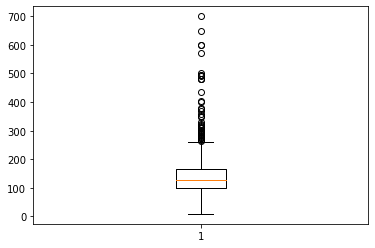

In [45]:
#Write your solution here
plt.boxplot(ndf['LoanAmount'])
plt.show()



In [46]:
q1 = ndf['LoanAmount'].quantile(0.25)
q3 = ndf['LoanAmount'].quantile(0.75)
IQR = q3 - q1
u_limit = q3 + 1.5 * IQR
l_limit = q1 - 1.5 * IQR
ndf1 = ndf[(ndf.LoanAmount > l_limit) & (ndf.LoanAmount < u_limit)]
ndf1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,146.412162,360.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0
2,3000.0,0.0,66.000000,360.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.000000,360.0,1.0
610,4106.0,0.0,40.000000,180.0,1.0
611,8072.0,240.0,253.000000,360.0,1.0
612,7583.0,0.0,187.000000,360.0,1.0


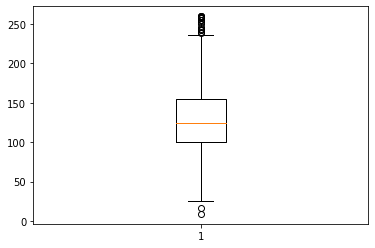

In [47]:
plt.boxplot(ndf1['Loan'])
plt.show()

In [33]:
ndf1.shape

(561, 5)

In [48]:
#Standard deviation
std = df.Loan_Amount_Term.std()
mean = df.Loan_Amount_Term.mean()
u_limit = mean + (3 * std)
l_limit = mean - (3 * std)
ndf1 = ndf1[(ndf1.Loan_Amount_Term > l_limit) & (ndf1.Loan_Amount_Term < u_limit)]
ndf1.shape

(561, 5)

## 3. Feature Transformation

Instructions:

- Use an appropriate graph to explore the distribution of each numeric feature. 



- Choose any one feature that needs to apply feature transformation. Apply each feature transformation technique and justify which feature transformation technique is suitable for the chosen feature.

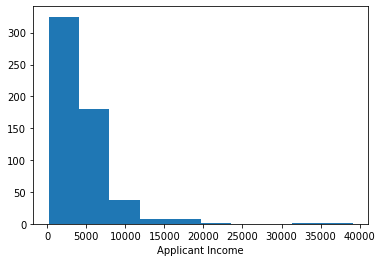

In [34]:
# Write your solution here
plt.hist(ndf1.ApplicantIncome)
plt.xlabel('Applicant Income')
plt.show()



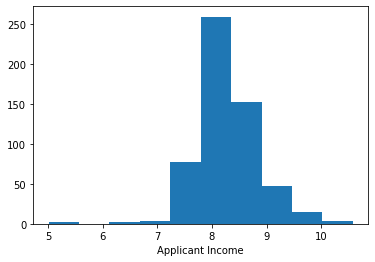

In [35]:
#LogTransformation
import numpy as np
x = np.log(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

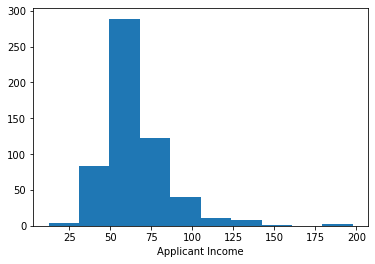

In [36]:
#squareroot transformation
x= np.sqrt(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

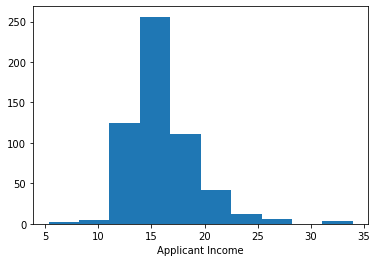

In [37]:
#cuberoot transformation
x = np.cbrt(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

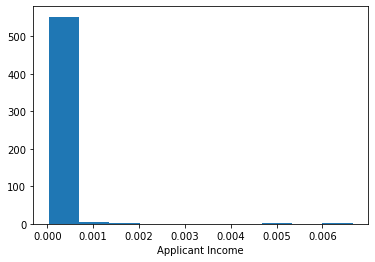

In [38]:
#Reciprocal Transformation
x= np.reciprocal(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

ValueError: supplied range of [1.3937095806663797e+65, inf] is not finite

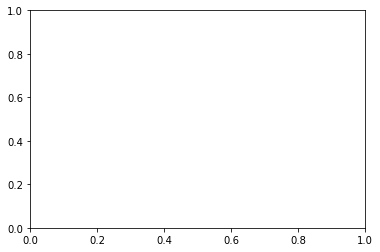

In [53]:
#exponential transformation
x= np.exp(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

##### For the feature ApplicantIncome, we can use the logarithmic transformation as it makes the ditribution more normal compared to other transformation methods.###

# 4. Feature Scaling

Instructions:


- Use all feature scaling techniques to scale all the numerical features in the given datasets and observe the difference in the scaled features when you use different scaling techniques.


In [65]:
# Write your solution here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
ndf1 = scaler.fit_transform(ndf)
ndf1 = pd.DataFrame(ndf1, columns = n_ndf.columns)
ndf1


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.070489,0.000000,0.198860,0.743590,1.0
1,0.054830,0.036192,0.172214,0.743590,1.0
2,0.035250,0.000000,0.082489,0.743590,1.0
3,0.030093,0.056592,0.160637,0.743590,1.0
4,0.072356,0.000000,0.191027,0.743590,1.0
...,...,...,...,...,...
609,0.034014,0.000000,0.089725,0.743590,1.0
610,0.048930,0.000000,0.044863,0.358974,1.0
611,0.097984,0.005760,0.353111,0.743590,1.0
612,0.091936,0.000000,0.257598,0.743590,1.0


In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ndf2 = scaler.fit_transform(ndf1)
ndf2 = pd.DataFrame(ndf2, columns = n_ndf.columns)
ndf2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,-0.554487,0.000000,0.279851,0.451640
1,-0.134412,-0.038732,-0.219273,0.279851,0.451640
2,-0.393747,-0.554487,-0.957641,0.279851,0.451640
3,-0.462062,0.251980,-0.314547,0.279851,0.451640
4,0.097728,-0.554487,-0.064454,0.279851,0.451640
...,...,...,...,...,...
609,-0.410130,-0.554487,-0.898095,0.279851,0.451640
610,-0.212557,-0.554487,-1.267279,-2.518655,0.451640
611,0.437174,-0.472404,1.269371,0.279851,0.451640
612,0.357064,-0.554487,0.483367,0.279851,0.451640


## 5. Categorical features


Instructions:


- Get all your categorical data in a new dataframe `cdf`. Refer your last class work on feature engineering on categorical features to make your categorical features ready for tranning machine learning model.

In [68]:
# Write your solution here
df1 = pd.read_csv('loan_train.csv')
categorical_cols =  df.select_dtypes(include = ['object','bool'])
impute = SimpleImputer(strategy='most_frequent')
data = impute.fit_transform(categorical_cols)
cdf = pd.DataFrame(data, columns=categorical_cols.columns)
cdf.drop(columns = 'Loan_ID', inplace =True)
cdf.isna().sum()



Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [69]:
categorical_cols = ['Gender', 'Married', 'Self_Employed']
cdf1 = cdf[categorical_cols]
cdf1 = pd.get_dummies(cdf1)
cdf1

,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes
0,0,1,1,0,1,0
1,0,1,0,1,1,0
2,0,1,0,1,0,1
3,0,1,0,1,1,0
4,0,1,1,0,1,0
...,...,...,...,...,...,...
609,1,0,1,0,1,0
610,0,1,0,1,1,0
611,0,1,0,1,1,0
612,0,1,0,1,1,0


In [72]:
#OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
cdf[['Property_Area','Education']] = oe.fit_transform(cdf[['Property_Area','Education']])
cdf3 = pd.DataFrame(cdf)
cdf3

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,0.0,No,2.0,Y
1,Male,Yes,1,0.0,No,0.0,N
2,Male,Yes,0,0.0,Yes,2.0,Y
3,Male,Yes,0,1.0,No,2.0,Y
4,Male,No,0,0.0,No,2.0,Y
...,...,...,...,...,...,...,...
609,Female,No,0,0.0,No,0.0,Y
610,Male,Yes,3+,0.0,No,0.0,Y
611,Male,Yes,1,0.0,No,2.0,Y
612,Male,Yes,2,0.0,No,2.0,Y


In [75]:
cdf = pd.concat([cdf2,cdf3], axis=1)
cdf.drop(['Gender','Married','Self_Employed'], axis=1, inplace=True)
cdf

,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Dependents,Education,Property_Area,Loan_Status
0,0,1,1,0,1,0,0,0.0,2.0,Y
1,0,1,0,1,1,0,1,0.0,0.0,N
2,0,1,0,1,0,1,0,0.0,2.0,Y
3,0,1,0,1,1,0,0,1.0,2.0,Y
4,0,1,1,0,1,0,0,0.0,2.0,Y
...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,0,0.0,0.0,Y
610,0,1,0,1,1,0,3+,0.0,0.0,Y
611,0,1,0,1,1,0,1,0.0,2.0,Y
612,0,1,0,1,1,0,2,0.0,2.0,Y


## 6. Combine Features

Instructions:

- Create a new dataframe `alldf` which contains transformed categorical and numerical features ready for traning machine learning model.

In [73]:
#Write your solution here
alldf = pd.concat([cdf,ndf], axis = 1)
alldf.head()
alldf.isna().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [74]:
alldf.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,0.0,No,2.0,Y,5849.0,0.0,146.412162,360.0,1.0
1,Male,Yes,1,0.0,No,0.0,N,4583.0,1508.0,128.000000,360.0,1.0
2,Male,Yes,0,0.0,Yes,2.0,Y,3000.0,0.0,66.000000,360.0,1.0
3,Male,Yes,0,1.0,No,2.0,Y,2583.0,2358.0,120.000000,360.0,1.0
4,Male,No,0,0.0,No,2.0,Y,6000.0,0.0,141.000000,360.0,1.0


# <center>THANK YOU